In [1]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd 

In [3]:
data = pd.read_pickle('data_feature_engineering.pkl')

In [4]:
data

France  Germany  Spain  Female  Male  CreditScore       Age    Tenure  \
0          1        0      0       1     0    -0.332983  0.490105 -1.041760   
1          0        0      1       1     0    -0.447572  0.374424 -1.387538   
2          1        0      0       1     0    -1.551792  0.490105  1.032908   
3          1        0      0       1     0     0.500391  0.143063 -1.387538   
4          0        0      1       1     0     2.073384  0.605786 -1.041760   
...      ...      ...    ...     ...   ...          ...       ...       ...   
9995       1        0      0       0     1     1.250427  0.143063 -0.004426   
9996       1        0      0       0     1    -1.405951 -0.319661  1.724464   
9997       1        0      0       1     0     0.604563 -0.203980  0.687130   
9998       0        1      0       0     1     1.260844  0.490105 -0.695982   
9999       1        0      0       1     0     1.469188 -1.129427 -0.350204   

       Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0    -1.225848              1          1               1         0.021886   
1     0.117350              1          0               1         0.216534   
2     1.333053              3          1               0         0.240687   
3    -1.225848              2          0               0        -0.108918   
4     0.785728              1          1               1        -0.365276   
...        ...            ...        ...             ...              ...   
9995 -1.225848              2          1               0        -0.066419   
9996 -0.306379              1          1               1         0.027988   
9997 -1.225848              1          0               1        -1.008643   
9998 -0.022608              2          1               0        -0.125231   
9999  0.859965              1          1               0        -1.076370   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 14 columns]

### Splitting the data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = data.iloc[:,0:13]
y = data.iloc[:,13]

In [7]:
x

France  Germany  Spain  Female  Male  CreditScore       Age    Tenure  \
0          1        0      0       1     0    -0.332983  0.490105 -1.041760   
1          0        0      1       1     0    -0.447572  0.374424 -1.387538   
2          1        0      0       1     0    -1.551792  0.490105  1.032908   
3          1        0      0       1     0     0.500391  0.143063 -1.387538   
4          0        0      1       1     0     2.073384  0.605786 -1.041760   
...      ...      ...    ...     ...   ...          ...       ...       ...   
9995       1        0      0       0     1     1.250427  0.143063 -0.004426   
9996       1        0      0       0     1    -1.405951 -0.319661  1.724464   
9997       1        0      0       1     0     0.604563 -0.203980  0.687130   
9998       0        1      0       0     1     1.260844  0.490105 -0.695982   
9999       1        0      0       1     0     1.469188 -1.129427 -0.350204   

       Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0    -1.225848              1          1               1         0.021886  
1     0.117350              1          0               1         0.216534  
2     1.333053              3          1               0         0.240687  
3    -1.225848              2          0               0        -0.108918  
4     0.785728              1          1               1        -0.365276  
...        ...            ...        ...             ...              ...  
9995 -1.225848              2          1               0        -0.066419  
9996 -0.306379              1          1               1         0.027988  
9997 -1.225848              1          0               1        -1.008643  
9998 -0.022608              2          1               0        -0.125231  
9999  0.859965              1          1               0        -1.076370  

[10000 rows x 13 columns]

In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 0)

In [10]:
x_train.shape

(8000, 13)

In [11]:
x_test.shape

(2000, 13)

In [12]:
y_train.shape

(8000,)

In [13]:
y_test.shape

(2000,)

### Using Traditional Machine Learning Algorithms 

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [15]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Print model performance sorted by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Ranking:")
for model, acc in sorted_results:
    print(f"{model}: {acc:.4f}")

Logistic Regression: Accuracy = 0.8280
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1595
           1       0.66      0.32      0.43       405

    accuracy                           0.83      2000
   macro avg       0.75      0.64      0.66      2000
weighted avg       0.81      0.83      0.80      2000

K-Nearest Neighbors: Accuracy = 0.8220
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1595
           1       0.60      0.37      0.46       405

    accuracy                           0.82      2000
   macro avg       0.73      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000

Decision Tree: Accuracy = 0.7985
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1595
           1       0.50      0.58      0.54       405

    accuracy                           0.80      2000
   macro avg     

### Using ANN

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from matplotlib import pyplot as plt

### Training the model

In [17]:
# intializing ANN

In [18]:
classifier =Sequential()

In [19]:
# adding input layer

In [20]:
classifier.add(Dense(units =13, activation ='relu'))

In [21]:
# adding hidden layer

In [22]:
classifier.add(Dense(units = 7, activation ='relu'))
classifier.add(Dropout(0.2))

In [23]:
# adding hidden layer 

In [24]:
classifier.add(Dense(units = 6, activation ='relu'))
classifier.add(Dropout(0.3))

In [25]:
# adding ouput layer 

In [26]:
classifier.add(Dense(units =1, activation ='sigmoid'))

In [27]:
# adding optimizer

In [28]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [29]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
# using early stopping 

In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [32]:
model_history = classifier.fit(x_train,y_train,validation_split =0.33,batch_size =10, epochs = 100, callbacks = early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7759 - loss: 0.5183 - val_accuracy: 0.8141 - val_loss: 0.4383
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8110 - loss: 0.4457 - val_accuracy: 0.8126 - val_loss: 0.4328
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8229 - loss: 0.4334 - val_accuracy: 0.8118 - val_loss: 0.4271
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8198 - loss: 0.4271 - val_accuracy: 0.8236 - val_loss: 0.4226
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8261 - loss: 0.4342 - val_accuracy: 0.8228 - val_loss: 0.4206
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8154 - loss: 0.4447 - val_accuracy: 0.8228 - val_loss: 0.4247
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8154 - loss: 0.4364 - val_accuracy: 0.8236 - val_loss: 0.4168
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8136 - loss: 0.4299 - val_accu

In [33]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

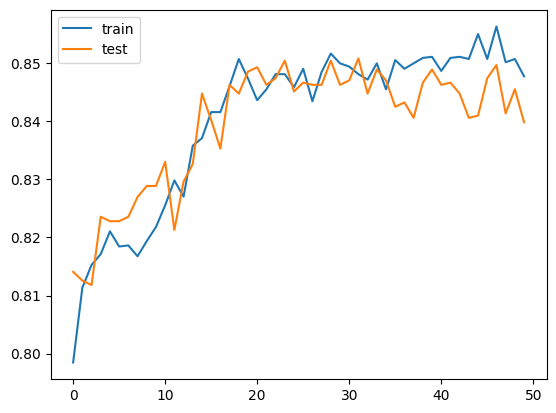

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'], loc = 'upper left')

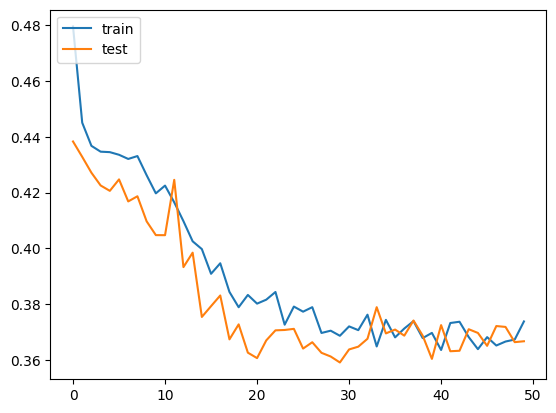

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train','test'], loc = 'upper left')

### Prediction

In [36]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5).astype(int) 


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [37]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Evaluation 

In [38]:
confusion_matrix(y_test,y_pred)

array([[1574,   21],
       [ 281,  124]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.849